<a href="https://colab.research.google.com/github/donghyuun/deep-learning/blob/main/lab_02_1_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

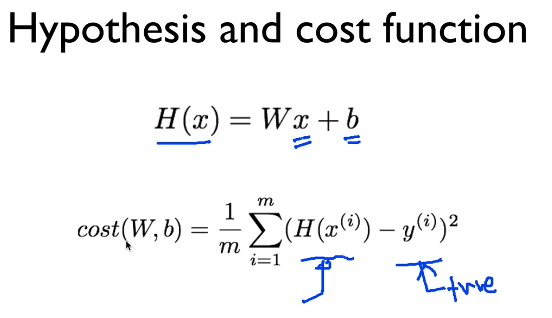

In [ ]:
import tensorflow as tf

# X and Y data
x_train = [1,2,3,4,5]
y_train = [2.1,3.1,4.1,5.1,6.1]

# TensorFlow 가 관장하는 변수(trainable variable)
W = tf.Variable(tf.random.normal([1]), name="weight") # [1] 은 Rank 가 1임을 의미
b = tf.Variable(tf.random.normal([1]), name="bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

# Build graph

In [ ]:
# Learning rate and optimizer
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # 학습률과 함께 SGD 알고리즘을 구현한 최적화 함수

In [ ]:
# Training loop
for step in range(2001):
    with tf.GradientTape() as tape:
        # Hypothesis: XW + b
        hypothesis = x_train * W + b
        # Cost function: Mean Squared Error (MSE)
        # h(x) 와 실제 값 y 의 차이를 제곱한 값들의 평균을 구함
        cost = tf.reduce_mean(tf.square(hypothesis - y_train))

    # Compute gradients, 기울기 계산
    gradients = tape.gradient(cost, [W, b])
    # Apply gradients, 경사하강법 알고리즘에 따라 기울기를 이용해 가중치 업데이트
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Print every 100 steps
    if step % 100 == 0:
        print(f"Step {step}, Cost: {cost.numpy()}, W: {W.numpy()}, b: {b.numpy()}")

Step 0, Cost: 1.2843892574310303, W: [1.5608741], b: [-0.09511922]
Step 100, Cost: 0.1464388370513916, W: [1.2476028], b: [0.20607558]
Step 200, Cost: 0.07438614219427109, W: [1.176471], b: [0.4628837]
Step 300, Cost: 0.03778574615716934, W: [1.1257741], b: [0.6459154]
Step 400, Cost: 0.01919393613934517, W: [1.0896415], b: [0.7763658]
Step 500, Cost: 0.009749884717166424, W: [1.0638891], b: [0.86933994]
Step 600, Cost: 0.004952635616064072, W: [1.045535], b: [0.9356043]
Step 700, Cost: 0.002515769563615322, W: [1.0324537], b: [0.982832]
Step 800, Cost: 0.0012779306853190064, W: [1.0231303], b: [1.016492]
Step 900, Cost: 0.0006491585518233478, W: [1.0164855], b: [1.040482]
Step 1000, Cost: 0.00032975367503240705, W: [1.0117496], b: [1.0575801]
Step 1100, Cost: 0.00016751028306316584, W: [1.0083742], b: [1.069766]
Step 1200, Cost: 8.509283361490816e-05, W: [1.0059686], b: [1.0784515]
Step 1300, Cost: 4.322400491219014e-05, W: [1.004254], b: [1.084642]
Step 1400, Cost: 2.1955489501124248

In [ ]:
# Prediction function
def predict(x_values):
    predictions = [x * W.numpy()[0] + b.numpy()[0] for x in x_values]
    return predictions

# Predict for new inputs
input_values = [5, 2.5, 1.5, 3.5]
predicted_values = predict(input_values)

# Display results
for i, val in enumerate(input_values):
    print(f"Input: {val}, Predicted Output: {predicted_values[i]}")

Input: 5, Predicted Output: 6.100553035736084
Input: 2.5, Predicted Output: 3.5995585322380066
Input: 1.5, Predicted Output: 2.5991607308387756
Input: 3.5, Predicted Output: 4.5999563336372375
